# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Step 1: Import necessary libraries and dataset 

In [160]:
# Import Modules 
import pandas as pd
import numpy as np
from pathlib import Path

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt

# Set up visualisation styles
# Display plots within notebook
%matplotlib inline 
sns.set_style("whitegrid")

# Normalization for Logistic regression(as basemodel)
# Usually, random forest model doesn't need scaling
from sklearn.preprocessing import StandardScaler

# Import ML models
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualisation for decision tree
import pydotplus
from IPython.display import Image

In [170]:
# Load the dataset
data = Path('ExtraaLearn.csv')
df = pd.read_csv(data)


In [171]:
# Review DataFrame
df

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


## Step 2: Understand Data Structure


In [172]:
# Check for missing values 
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [173]:
# Check for duplicate values
df.duplicated().sum()

0

In [174]:
# Get summary of the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

(4612, 15)

In [175]:
# Get statistical summary 
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


#### Initial data summary:

The dataset is well structured, clean, with no missing or duplicate entries across 4612 entries(rows) and 15 columns(features).

Observation of the statistics reveals:
 * A broad age range, from 18 to 63 among leads.
 * Diverse engagement levels with the website visits range from 0 to 30.
 * Time spent on the website varies significantly, ranging from 0 to 2537.
 * Page visits have an average of about 3 pages, suggesting how many pages a lead views in a single visit.
 * Status indeicates a lower overall conversion rate with approximately 30%.
 


## Step 3 : Exploratory Data Analysis(EDA)


### 3.1 Distribution of individual features:



In [176]:
# Check number of unique ID vlues
len(df['ID'].unique())


4612

In [177]:
# Drop ID column(it's irrelevant for our analysis ), copy DF. 
df = df.drop(columns = 'ID').copy()

In [179]:
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [184]:
# Define columns with continous variables
continuous_vars = df.select_dtypes(include=['int64','float64']).columns

In [185]:
# Calculate number of continous var
len(continuous_vars)

5

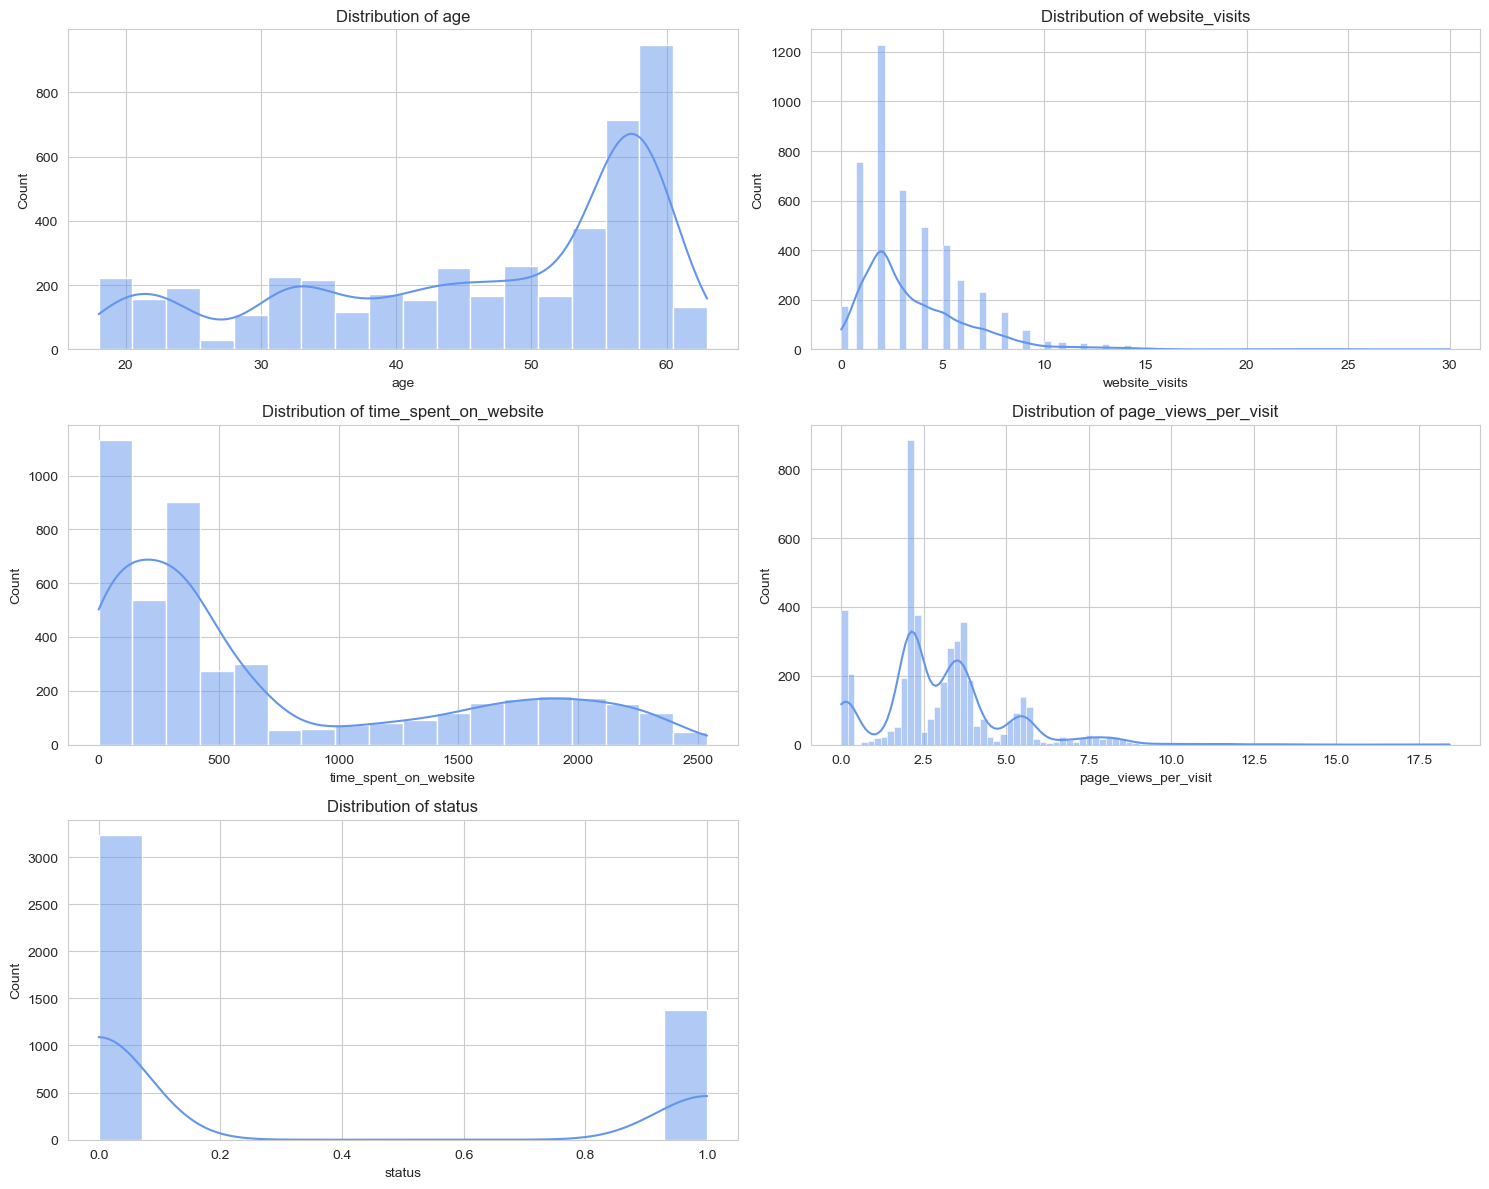

In [194]:
# Plot distribution for continous variables
plt.figure(figsize=(15,12))

# Create a subplot for each variable
for i, var in enumerate(continuous_vars):
    plt.subplot(3,2,i+1)
    sns.histplot(df[var], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {var}')

# Adjust layout to prevent overlapping    
plt.tight_layout()

# Save plots
plt.savefig('images/continuous_variables_distribution.png',  dpi=300)

# Show plots
plt.show()
    

In [197]:
# Define columns with categorical variables
categorical_vars = df.select_dtypes(include='object').columns

In [198]:
# Calculate number of catecorial var
len(categorical_vars)

9

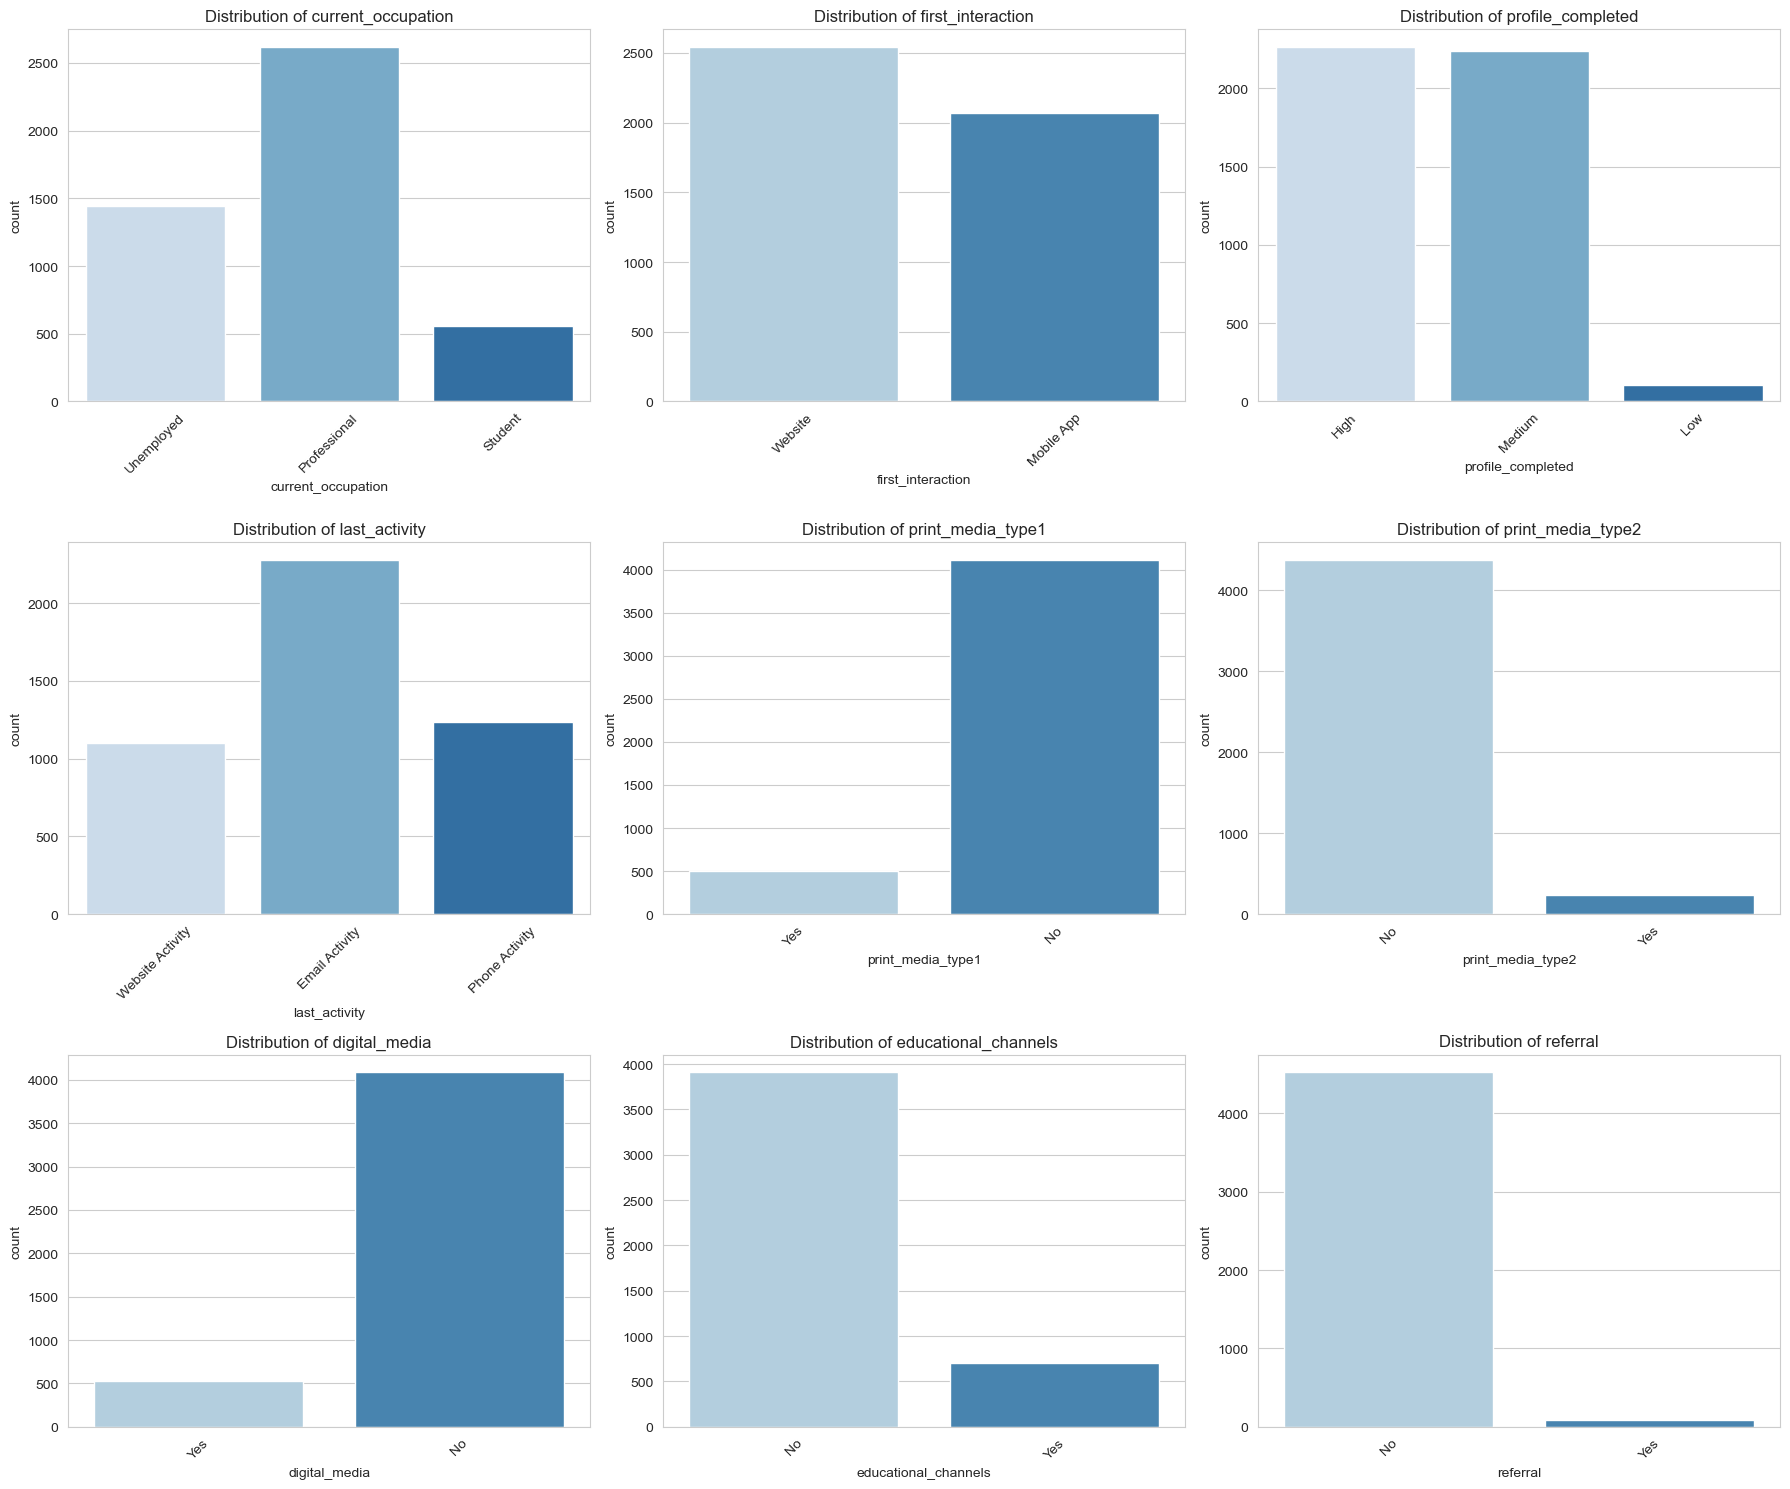

In [199]:
# Plot distribution for categorical variables
plt.figure(figsize=(18,15))

# Create a subplot for each variable
for i, var in enumerate(categorical_vars):
    plt.subplot(3,3,i +1)
    sns.countplot(data=df, x=var, palette="Blues")
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    
# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/categorical_variables_distribution.png',  dpi=300)

# Show plots
plt.show()

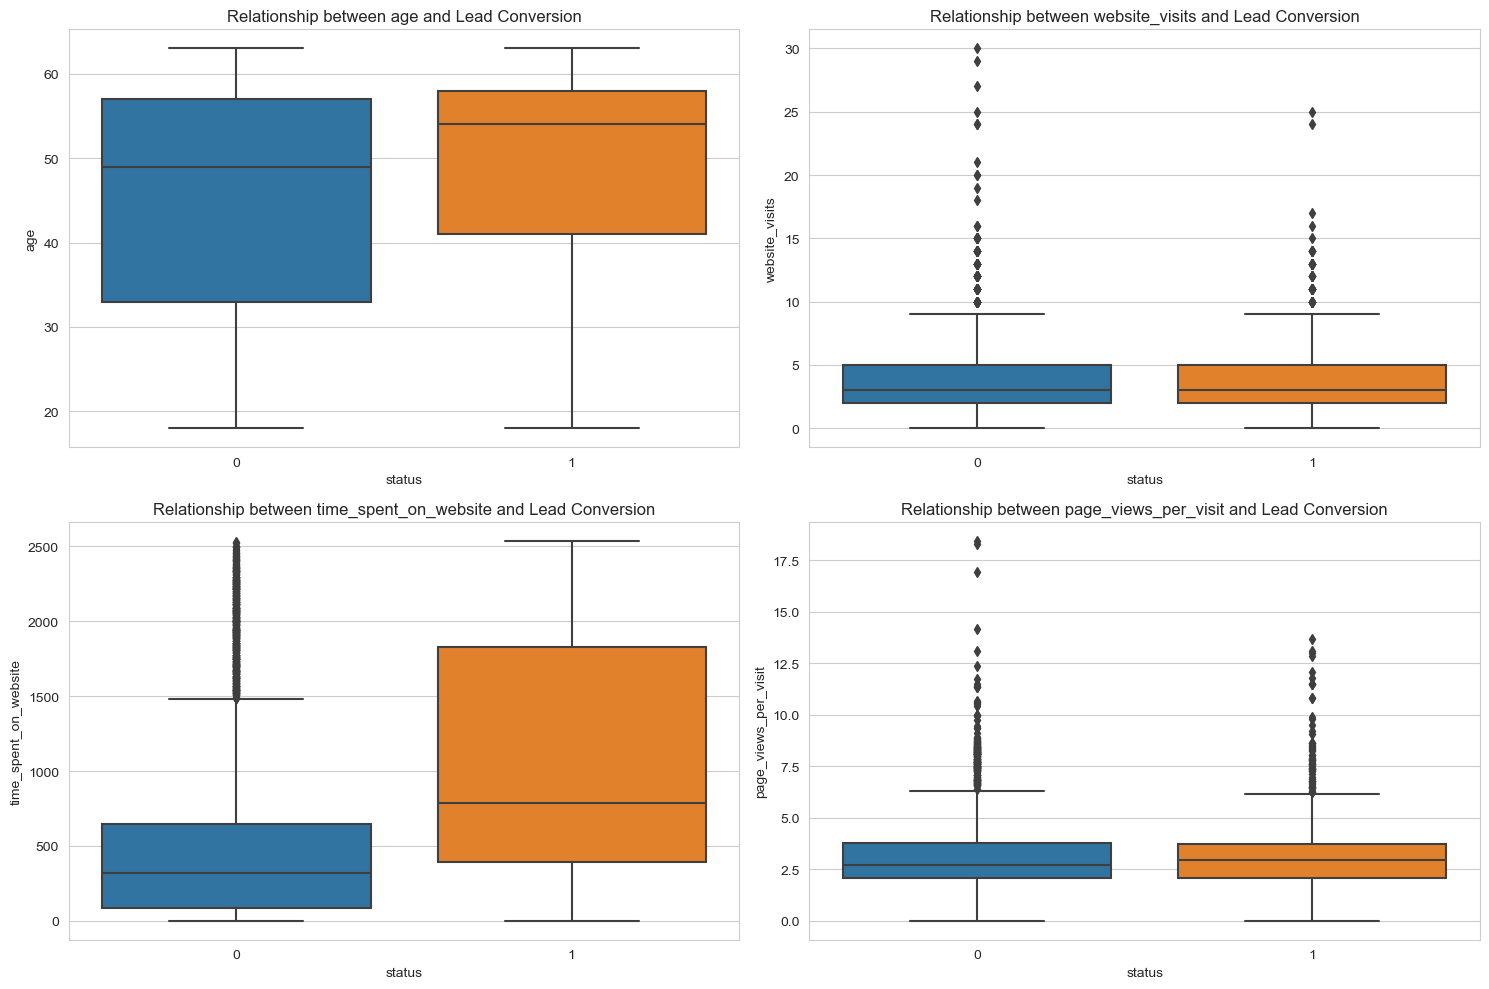

In [204]:
# Create box plots to identify if certain ranges of continous values are more associated with converted leads.
plt.figure(figsize=(15, 10))
for i, var in enumerate(['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='status', y=var, data=df)
    plt.title(f'Relationship between {var} and Lead Conversion')
    
# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/lead_conversion_relationships.png',  dpi=300)

# Show plots
plt.show()

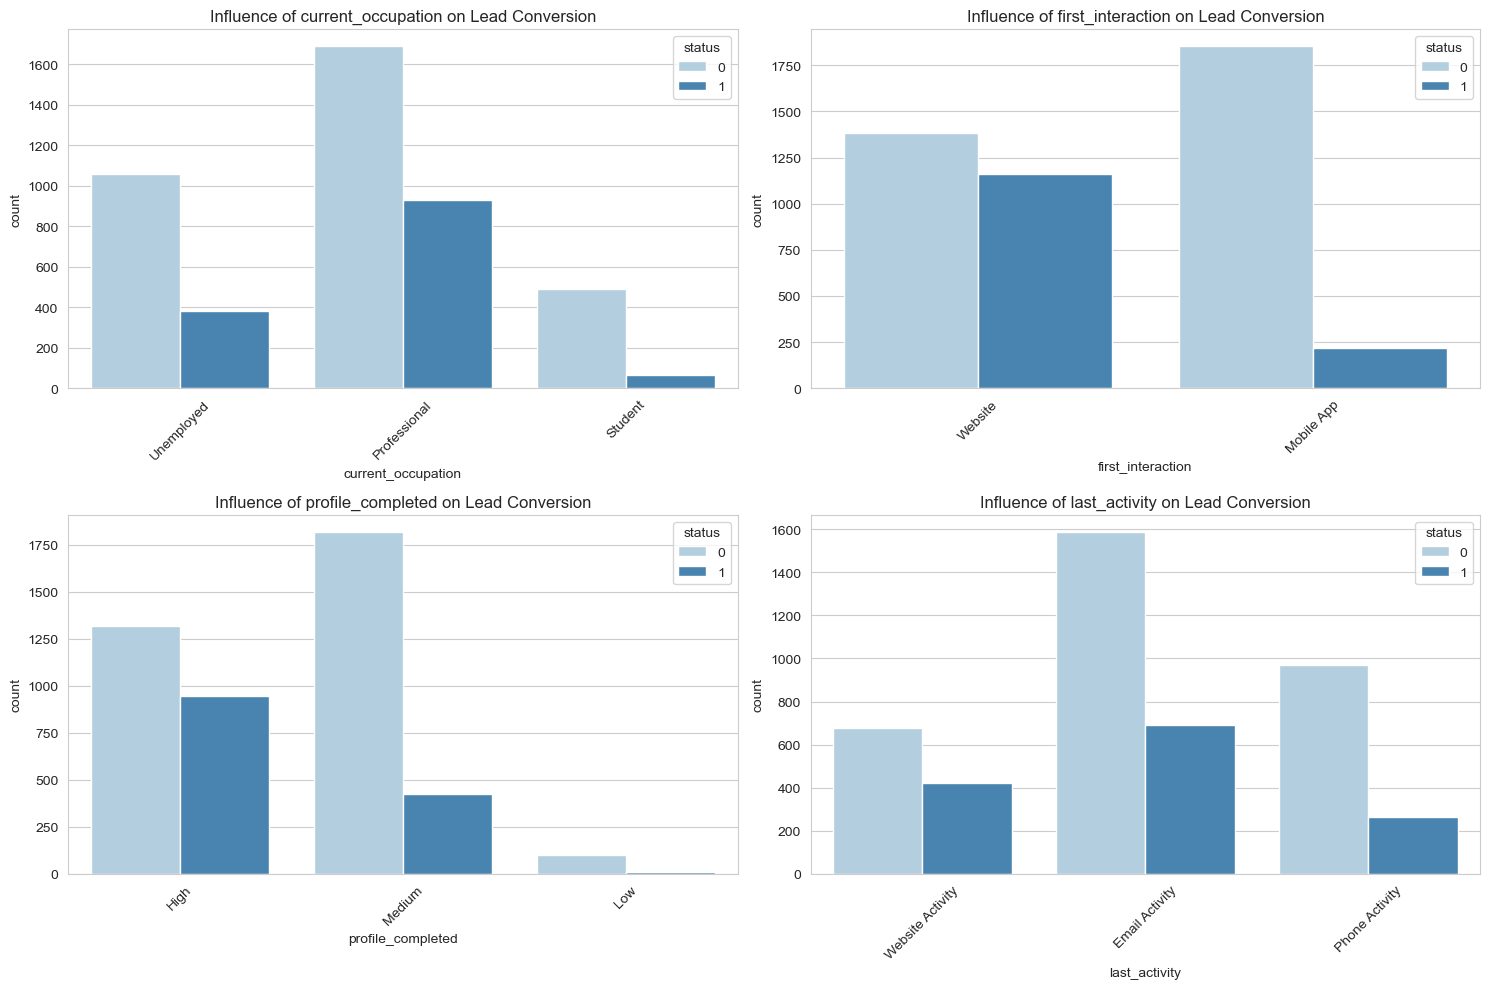

In [214]:
# Create count plots to identify which categories have a higher likelihood of converting to paid customers.
plt.figure(figsize=(15, 10))
for i, var in enumerate(['current_occupation', 'first_interaction', 'profile_completed','last_activity']): 
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=var, hue='status', data=df, palette="Blues")
    plt.title(f'Influence of {var} on Lead Conversion')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/lead_conversion_influence.png',  dpi=300)

# Show plots
plt.show()

#### Summary:
Age and Website Engagement: Certain age groups and higher levels of website engagement (indicated by frequent visits and longer browsing times) are more likely to convert to paying customers.

Profile Completion and Occupation: Leads with fully completed profiles and those identifying as professionals demonstrate a higher conversion rate, aligning with the project's goal to target potential customers effectively.

Initial Interaction and Last Activity: The mode of first interaction and the nature of the last activity with ExtraaLearn significantly influence lead conversion, underscoring the importance of optimizing these touchpoints for better engagement and conversion.

## Step 3: Data visualization

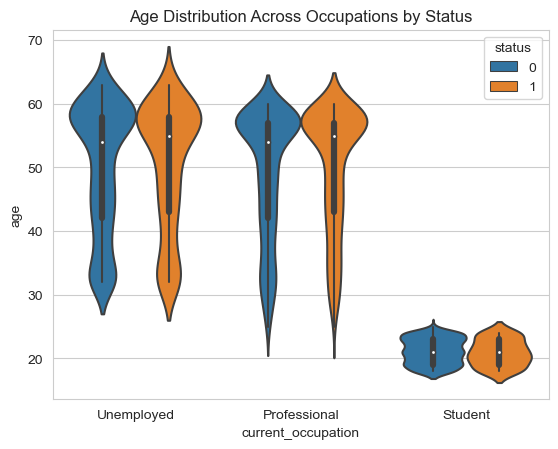

In [12]:
# Plot Violin plot(distribution of numerical variables across different catigories)
sns.violinplot(x='current_occupation', y='age', data=df, hue='status')
plt.title('Age Distribution Across Occupations by Status')
plt.show()

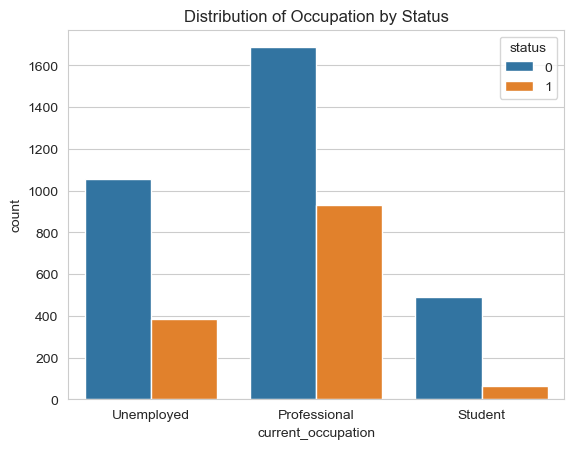

In [13]:
# Plot Count plot for features to highlite imbalances in dominant catigories
sns.countplot(x='current_occupation', data=df, hue='status')
plt.title('Distribution of Occupation by Status')
plt.show()

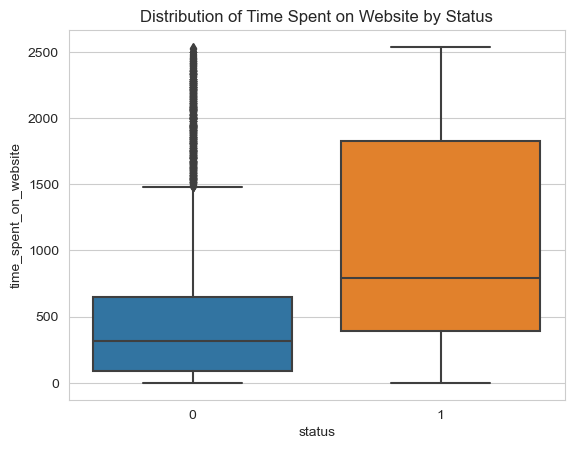

In [14]:
# Plot Box plot for numerical features 
sns.boxplot(x='status', y='time_spent_on_website', data=df)
plt.title('Distribution of Time Spent on Website by Status')
plt.show()

In [67]:
# Plot Box plots for numerical features 
print("\nBox plots for numerical features:")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_features:
    df[column].sns.boxplot
    plt.title(column)
    plt.show()


Box plots for numerical features:


AttributeError: 'Series' object has no attribute 'sns'

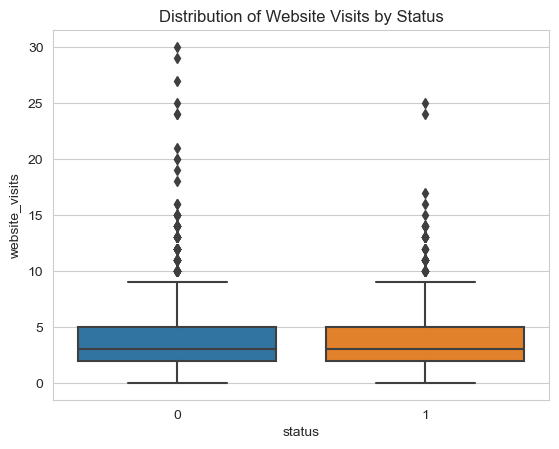

In [15]:
sns.boxplot(x='status', y='website_visits', data=df)
plt.title('Distribution of Website Visits by Status')
plt.show()

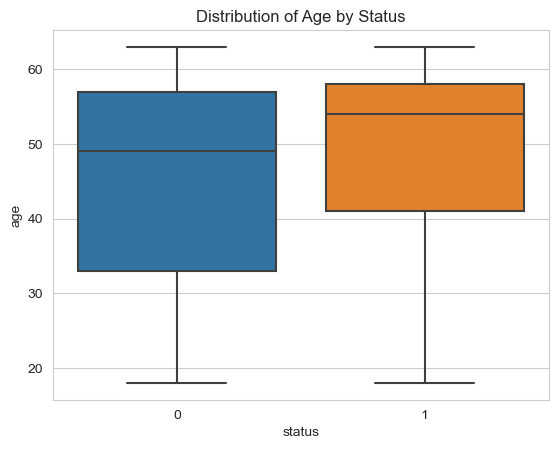

In [16]:
sns.boxplot(x='status', y='age', data=df)
plt.title('Distribution of Age by Status')
plt.show()


Histograms for Numerical Features:


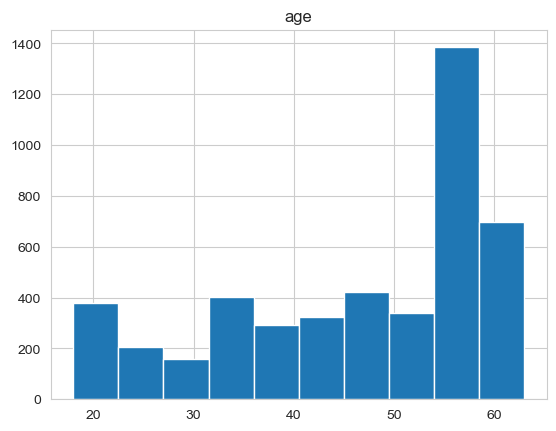

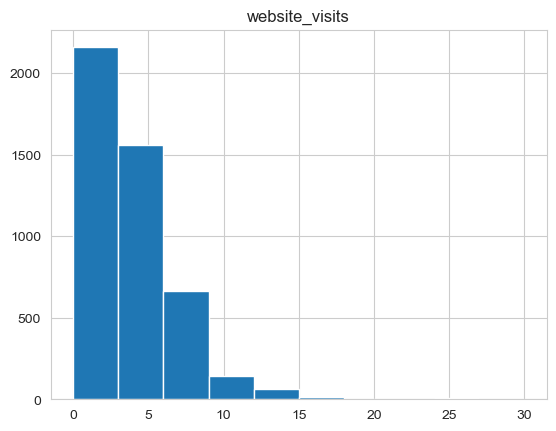

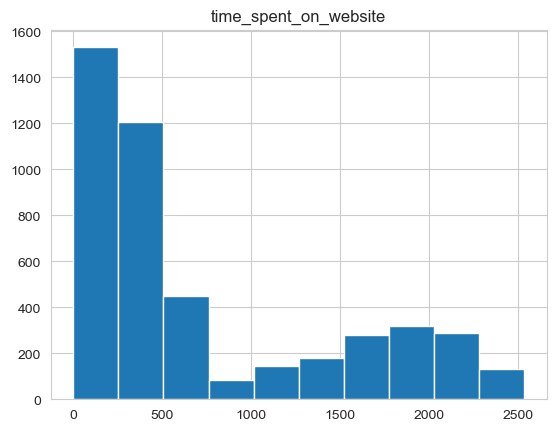

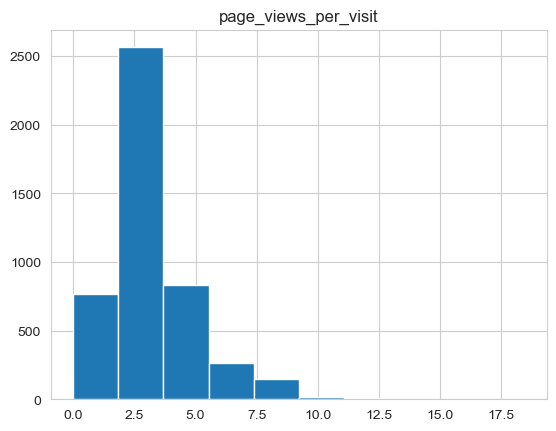

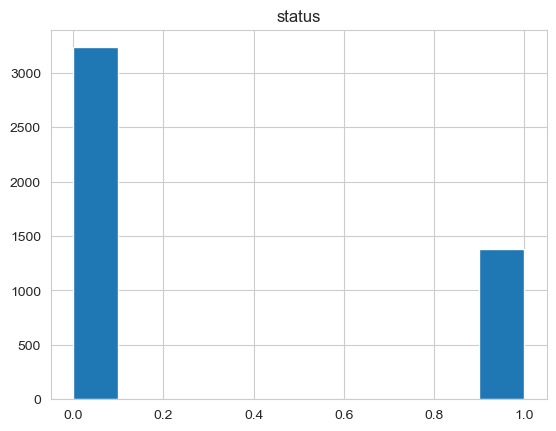

In [17]:
# Visualize histograms for numerical features(do not neeed staus column)
print("\nHistograms for Numerical Features:")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_features:
    df[column].hist()
    plt.title(column)
    plt.show()

4612

In [64]:
# Drop ID column. It's irrelevant for our analysis 
df = df.drop(columns = 'ID')


Bar Charts for Categorical Features:


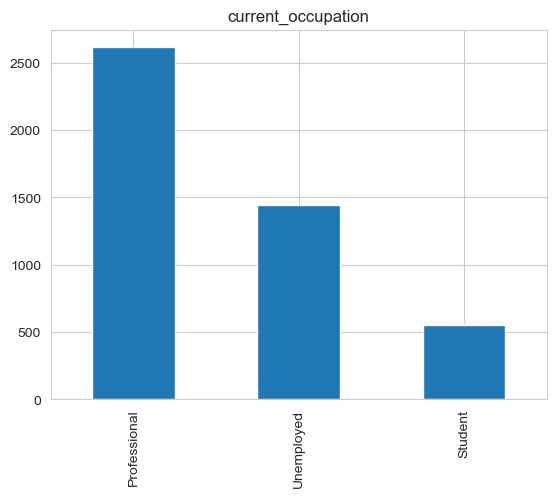

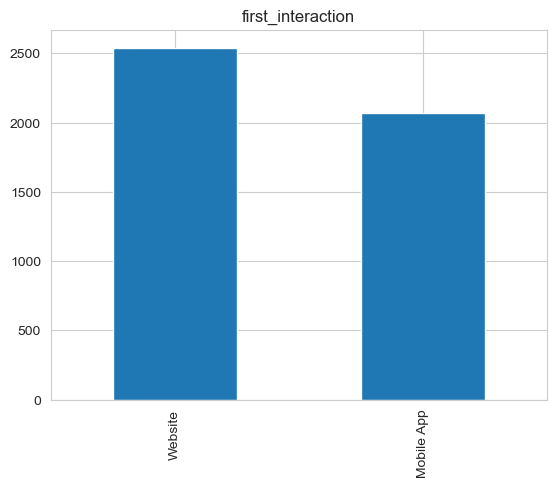

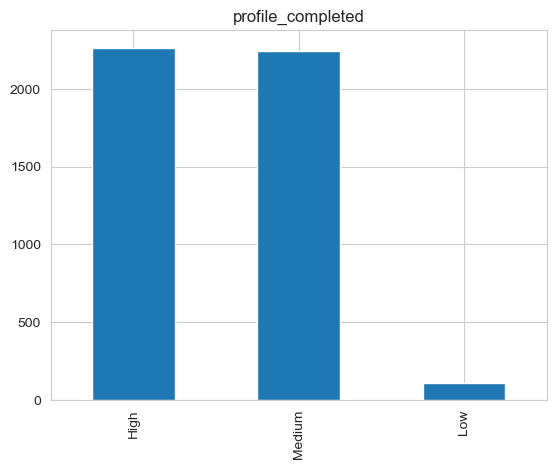

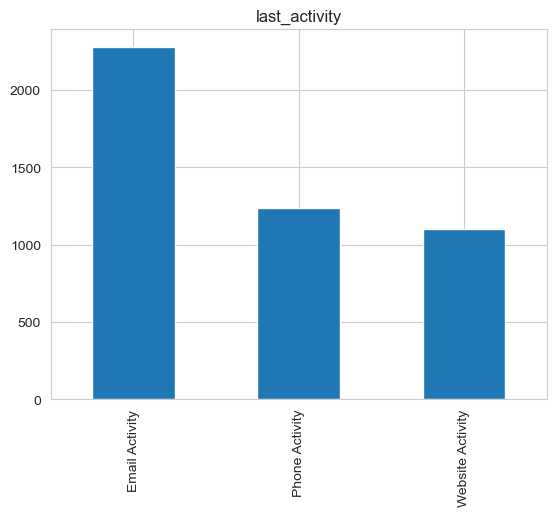

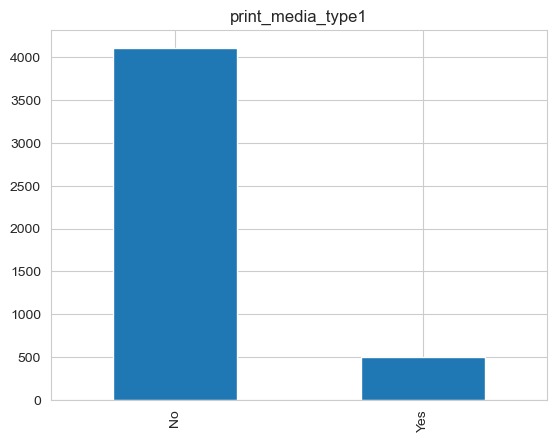

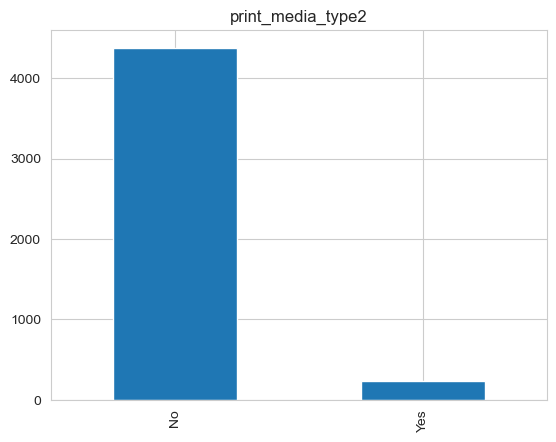

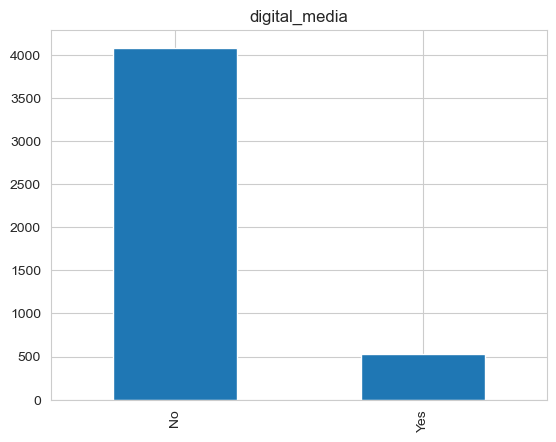

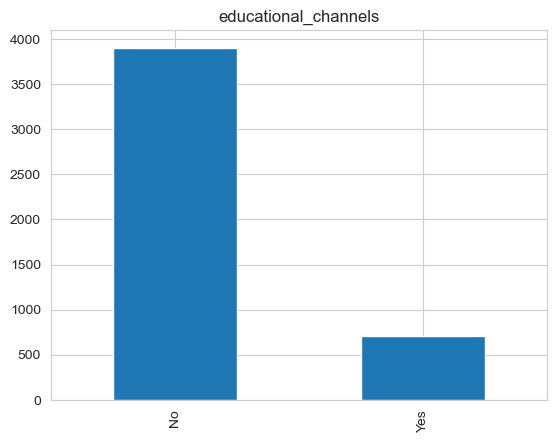

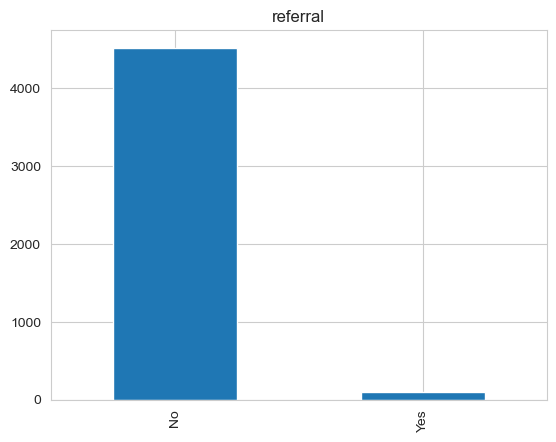

In [65]:
# Create bar charts for categorical features(don't need ID column)
print("\nBar Charts for Categorical Features:")
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
for column in categorical_features:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()


Correlation Matrix:


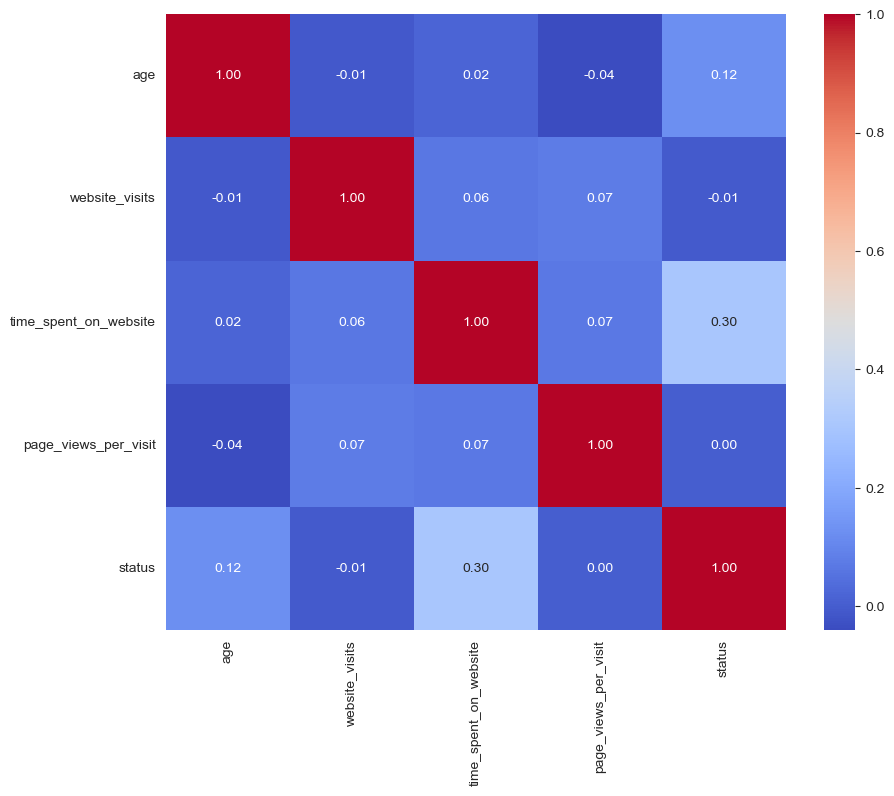

In [22]:
# Create Correlation Matrix
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

4612

KeyError: ''

In [ ]:
# Decision tree doesn't need scaling because desidions are not based on arithmetical operations

In [57]:
# # Install librarie for decidion tree visualization 
# %conda install python-graphviz -y 
# Draw graph = pydotplus.graph_from_data("your_model")
# #Show graph 
# Image(graph.create_png())
# # Save graph
# file_path = ("../Test_assesment/decidion_tree_graph.png")
# graph.write_png(file_path)

In [58]:
# Explore Grid Search optimization function for Random forest to find optimal value of e-estimators
# Set random state for replicating the same results of the model in the future

In [ ]:
# # Calculate feature importance 
# importance = your_rf_model.feature_importances_

In [60]:
# # Zip the feature importances with the assosiated feature name
# important_features = zip(X.columns,your_rf_model.feature_importances_)
# important_features

In [ ]:
# # Create a dataframe of the important features
# importances_df = pd.DataFrame(important_features)

# # Rename the columns 
# importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# # Set index 
# importances_df = importances_df.set_index('Feature')

# # Sort the dataframe by feature importance
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

In [ ]:
# # Plot the top 10 most important features
# importances_df[0:10].plot(
#     kind='brah',
#     color='lightgreen',
#     title='Feature Importance',
#     legend=True)


In [ ]:
# # Get count on inportant features
# importances_df.head()

In [87]:
# # Confusio matrix
# TN = matrix[0,0]
# FP = matrix[0,1]
# FN = matrix[1,0]
# TP = matrix[1,1]
# Specificity =  round(TN / (FP + TN), 4) # True Negative Rate 
# FPR  = round(FP / (FP + TN), 4)
# Confidence = round(1 - FPR, 4)
# Precision = TP / (FP + TP)
# Recall_Power = round(TP / (TP + FN), 4) #Sensitivity or TPR
# G_mean = (Specificity * Recall_Power) **(1/2) 
# Accuracy = round((TP + TN) / (TP +FP + TN + FN), 4)
# f1_score = 2 * (Precision * Recall_Power) / (Precision + Recall_Power)

In [27]:
# Check for unique values in all columns
def unique_values (df):
    for df[] df[].unique()

SyntaxError: invalid syntax (2899665999.py, line 2)

In [35]:
# Get values of the columns and see if there are any columns that could be dropped
df.value_counts()

ID       age  current_occupation  first_interaction  profile_completed  website_visits  time_spent_on_website  page_views_per_visit  last_activity     print_media_type1  print_media_type2  digital_media  educational_channels  referral  status
EXT001   57   Unemployed          Website            High               7               1639                   1.861                 Website Activity  Yes                No                 Yes            No                    No        1         1
EXT3530  56   Professional        Website            High               1               307                    2.039                 Email Activity    No                 No                 No             Yes                   No        1         1
EXT3709  44   Professional        Mobile App         Medium             2               1189                   2.186                 Phone Activity    No                 No                 No             No                    No        0         1
EXT3708  45  

In [38]:
# Drop ID column. It has no value for the model !!! Drop correctly!!! (column=True)
# Copy DataFrame 
df_new = df.drop('ID', axis=1).copy()

In [39]:
df_new

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [40]:
df_new.value_counts()

age  current_occupation  first_interaction  profile_completed  website_visits  time_spent_on_website  page_views_per_visit  last_activity     print_media_type1  print_media_type2  digital_media  educational_channels  referral  status
56   Professional        Mobile App         Medium             0               0                      0.000                 Phone Activity    No                 No                 No             No                    No        0         3
58   Professional        Mobile App         High               0               0                      0.000                 Email Activity    No                 No                 No             No                    No        0         3
60   Unemployed          Website            High               0               0                      0.000                 Email Activity    No                 No                 No             No                    No        0         2
59   Unemployed          Mobile App         High 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations